<a href="https://colab.research.google.com/github/kay-liao/bigdata/blob/main/0330_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("rJava")
install.packages("jiebaR")
install.packages("tmcn")
install.packages("dplyr")
install.packages("lubridate")
install.packages("stringr")
install.packages("wordcloud")
install.packages("wordcloud2")
install.packages("Rwordseg", repos = "http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘jiebaRD’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is not available”
Warning message in install.packages("Rwordseg", repos = "http://R-Forge.R-project.org"):
“installation of package ‘Rwordseg’ had non-zero exit status”


In [4]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud) # 非互動式文字雲 
library(wordcloud2) # 互動式文字雲 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: jiebaRD

Loading required package: RColorBrewer



In [5]:
content <- "2019年1月6日，連續10場的「人生無限公司」巡演最終場於臺中市洲際棒球場畫下完美句點，在這之後宣布暫時休息。同年5月24日，第三部演唱會電影《五月天人生無限公司3D》正式上映。 此外，為紀念五月天的前三張錄音室專輯「藍色三部曲」發行20週年，特別將收錄在該三張專輯中的歌曲重新編曲演唱，並拍攝全新版本的音樂錄影帶，賦予歌曲新的意義與故事。於同年5月6日釋出首部曲〈純真〉；於7月7日釋出二部曲〈瘋狂世界〉；於2020年1月1日釋出三部曲〈溫柔〉，並特邀孫燕姿參與演唱 。11月14日，台北市跨年晚會承辦單位必應創造發布五月天擔任「臺北最High新年城－2020跨年晚會」之開場嘉賓，是他們睽違8年於台北市政府參與跨年。 12月21－22、24－25、28－29、31日、2020年1月1、3－4日，於桃園國際棒球場連續舉行10場「Just Rock It!!!『藍｜BLUE』」演唱會。後宣布於同年12月27日加開1場，總計11場。"

In [6]:
content

[1] "2019年1月6日，連續10場的「人生無限公司」巡演最終場於臺中市洲際棒球場畫下完美句點，在這之後宣布暫時休息。同年5月24日，第三部演唱會電影《五月天人生無限公司3D》正式上映。 此外，為紀念五月天的前三張錄音室專輯「藍色三部曲」發行20週年，特別將收錄在該三張專輯中的歌曲重新編曲演唱，並拍攝全新版本的音樂錄影帶，賦予歌曲新的意義與故事。於同年5月6日釋出首部曲〈純真〉；於7月7日釋出二部曲〈瘋狂世界〉；於2020年1月1日釋出三部曲〈溫柔〉，並特邀孫燕姿參與演唱 。11月14日，台北市跨年晚會承辦單位必應創造發布五月天擔任「臺北最High新年城－2020跨年晚會」之開場嘉賓，是他們睽違8年於台北市政府參與跨年。 12月21－22、24－25、28－29、31日、2020年1月1、3－4日，於桃園國際棒球場連續舉行10場「Just Rock It!!!『藍｜BLUE』」演唱會。後宣布於同年12月27日加開1場，總計11場。"

In [7]:
cutter <- worker(bylines = F) 

In [8]:
cutter[content]

[1] "2019"     "年"       "1"        "月"       "6"        "日"      
  [7] "連續"     "10"       "場的"     "人生"     "無限公司" "巡演"    
 [13] "最"       "終場"     "於"       "臺中市"   "洲際"     "棒球場"  
 [19] "畫下"     "完美"     "句點"     "在"       "這"       "之後"    
 [25] "宣布"     "暫時"     "休息"     "同年"     "5"        "月"      
 [31] "24"       "日"       "第三部"   "演唱會"   "電影"     "五月天"  
 [37] "人生"     "無限公司" "3"        "D"        "正式"     "上映"    
 [43] "此外"     "為"       "紀念"     "五月天"   "的"       "前"      
 [49] "三張"     "錄音室"   "專輯"     "藍色"     "三部曲"   "發行"    
 [55] "20"       "週年"     "特別"     "將"       "收錄"     "在"      
 [61] "該"       "三張"     "專輯"     "中"       "的"       "歌曲"    
 [67] "重新"     "編曲"     "演唱"     "並"       "拍攝"     "全新"    
 [73] "版本"     "的"       "音樂"     "錄影帶"   "賦予"     "歌曲"    
 [79] "新"       "的"       "意義"     "與"       "故事"     "於"      
 [85] "同年"     "5"        "月"       "6"        "日"       "釋出"    
 [91] "首部曲"   "純真"     "於"       "7"        "月"       "7"       
 [97] "日"       "釋出"     "二部曲"   "瘋狂"     "世界"     "於"      
[103] "2020"     "年"       "1"        "月"       "1"        "日"      
[109] "釋出"     "三部曲"   "溫柔"     "並"       "特邀"     "孫燕姿"  
[115] "參與"     "演唱"     "11"       "月"       "14"       "日"      
[121] "台北市"   "跨年"     "晚會"     "承辦"     "單位"     "必應"    
[127] "創造"     "發布"     "五月天"   "擔任"     "臺北"     "最"      
[133] "High"     "新年"     "城"       "2020"     "跨年"     "晚會"    
[139] "之"       "開場"     "嘉賓"     "是"       "他們"     "睽違"    
[145] "8"        "年"       "於"       "台北市"   "政府"     "參與"    
[151] "跨年"     "12"       "月"       "21"       "22"       "24"      
[157] "25"       "28"       "29"       "31"       "日"       "2020"    
[163] "年"       "1"        "月"       "1"        "3"        "4"       
[169] "日"       "於"       "桃園"     "國際"     "棒球場"   "連續"    
[175] "舉行"     "10"       "場"       "Just"     "Rock"     "It"      
[181] "藍"       "BLUE"     "演唱會"   "後"       "宣布"     "於"      
[187] "同年"     "12"       "月"       "27"       "日"       "加開"    
[193] "1"        "場"       "總計"     "11"       "場"

In [9]:
new_words <- c("人生無限公司","藍色三部曲","臺中市洲際棒球場","五月天人生無限公司3D","瘋狂世界","桃園國際棒球場","孫燕姿")
for (i in 1:length(new_words)) { new_user_word(cutter, new_words[i])}

In [10]:
content <- str_remove_all(content, "[0-9a-zA-Z]+?")
cutter[content]

[1] "年月日"           "連續"             "場的"            
  [4] "人生無限公司"     "巡演"             "最"              
  [7] "終場"             "於"               "臺中市洲際棒球場"
 [10] "畫下"             "完美"             "句點"            
 [13] "在"               "這"               "之後"            
 [16] "宣布"             "暫時"             "休息"            
 [19] "同"               "年月日"           "第三部"          
 [22] "演唱會"           "電影"             "五月天"          
 [25] "人生無限公司"     "正式"             "上映"            
 [28] "此外"             "為"               "紀念"            
 [31] "五月天"           "的"               "前"              
 [34] "三張"             "錄音室"           "專輯"            
 [37] "藍色三部曲"       "發行"             "週年"            
 [40] "特別"             "將"               "收錄"            
 [43] "在"               "該"               "三張"            
 [46] "專輯"             "中"               "的"              
 [49] "歌曲"             "重新"             "編曲"            
 [52] "演唱"             "並"               "拍攝"            
 [55] "全新"             "版本"             "的"              
 [58] "音樂"             "錄影帶"           "賦予"            
 [61] "歌曲"             "新"               "的"              
 [64] "意義"             "與"               "故事"            
 [67] "於"               "同"               "年月日"          
 [70] "釋出"             "首部曲"           "純真"            
 [73] "於"               "月"               "日"              
 [76] "釋出"             "二部曲"           "瘋狂世界"        
 [79] "於"               "年月日"           "釋出"            
 [82] "三部曲"           "溫柔"             "並"              
 [85] "特邀"             "孫燕姿"           "參與"            
 [88] "演唱"             "月"               "日"              
 [91] "台北市"           "跨年"             "晚會"            
 [94] "承辦"             "單位"             "必應"            
 [97] "創造"             "發布"             "五月天"          
[100] "擔任"             "臺北"             "最新"            
[103] "年城"             "跨"               "年"              
[106] "晚會"             "之"               "開場"            
[109] "嘉賓"             "是"               "他們"            
[112] "睽違"             "年"               "於"              
[115] "台北市"           "政府"             "參與"            
[118] "跨年"             "月"               "日"              
[121] "年"               "月"               "日"              
[124] "於"               "桃園國際棒球場"   "連續"            
[127] "舉行"             "場"               "藍"              
[130] "演唱會"           "後"               "宣布"            
[133] "於"               "同"               "年月日"          
[136] "加"               "開場"             "總計"            
[139] "場"

In [ ]:
new_words <- c("人生無限公司","藍色三部曲","臺中市洲際棒球場","五月天人生無限公司3D","瘋狂世界","桃園國際棒球場","孫燕姿")
writeLines(new_words, "new_words.txt")

In [19]:
stop_words <- c("的","於","與","為","年","月","日","場","同")
writeLines(stop_words, "stop_words.txt")

In [20]:
cutter <- worker(user = "new_words.txt", stop_word = "stop_words.txt", bylines = FALSE)
seg_words <- cutter[content]
seg_words

[1] "年月日"   "連續"     "場的"     "人生"     "無限公司" "巡演"    
  [7] "最"       "終場"     "臺中市"   "洲際"     "棒球場"   "畫下"    
 [13] "完美"     "句點"     "在"       "這"       "之後"     "宣布"    
 [19] "暫時"     "休息"     "年月日"   "第三部"   "演唱會"   "電影"    
 [25] "五月天"   "人生"     "無限公司" "正式"     "上映"     "此外"    
 [31] "紀念"     "五月天"   "前"       "三張"     "錄音室"   "專輯"    
 [37] "藍色"     "三部曲"   "發行"     "週年"     "特別"     "將"      
 [43] "收錄"     "在"       "該"       "三張"     "專輯"     "中"      
 [49] "歌曲"     "重新"     "編曲"     "演唱"     "並"       "拍攝"    
 [55] "全新"     "版本"     "音樂"     "錄影帶"   "賦予"     "歌曲"    
 [61] "新"       "意義"     "故事"     "年月日"   "釋出"     "首部曲"  
 [67] "純真"     "釋出"     "二部曲"   "瘋狂"     "世界"     "年月日"  
 [73] "釋出"     "三部曲"   "溫柔"     "並"       "特邀"     "孫燕姿"  
 [79] "參與"     "演唱"     "台北市"   "跨年"     "晚會"     "承辦"    
 [85] "單位"     "必應"     "創造"     "發布"     "五月天"   "擔任"    
 [91] "臺北"     "最新"     "年城"     "跨"       "晚會"     "之"      
 [97] "開場"     "嘉賓"     "是"       "他們"     "睽違"     "台北市"  
[103] "政府"     "參與"     "跨年"     "桃園"     "國際"     "棒球場"  
[109] "連續"     "舉行"     "藍"       "演唱會"   "後"       "宣布"    
[115] "年月日"   "加"       "開場"     "總計"

In [21]:
txt_freq <- freq(seg_words)
txt_freq <- arrange(txt_freq, desc(freq))
head(txt_freq)

,char,freq
,<chr>,<dbl>
1,年月日,5
2,五月天,3
3,釋出,3
4,三張,2
5,三部曲,2
6,連續,2


In [22]:
install.packages("showtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [23]:
library(showtext)

Loading required package: sysfonts

Loading required package: showtextdb



In [24]:
showtext.auto (enable=TRUE)

'showtext.auto()' is now renamed to 'showtext_auto()'
The old version still works, but consider using the new function in future code



Warning message in strwidth(words[i], cex = size[i], ...):
“"order.colors" is not a graphical parameter”
Warning message in strwidth(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in strheight(words[i], cex = size[i], ...):
“"order.colors" is not a graphical parameter”
Warning message in strheight(words[i], cex = size[i], ...):
“font family 'Microsoft YaHei' not found, will use 'sans' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“"order.colors" is not a graphical parameter”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“font family 'Microsoft YaHei' not found, will use 'wqy-microhei' instead”
Warning message in text.default(x1, y1, words[i

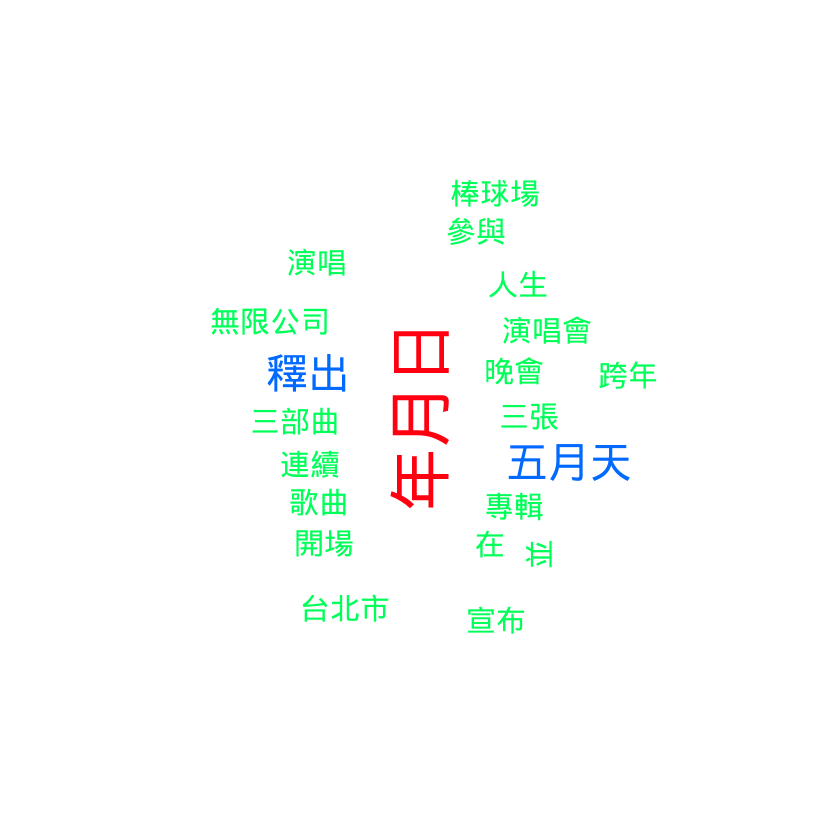

In [25]:
par(family=("Microsoft YaHei"))
wordcloud(txt_freq$char, txt_freq$freq, min.freq = 2 , random.order = F, order.colors = F , colors = rainbow(nrow(txt_freq)))